# Assignment 1: Classification

Machine Learning for Finance  
VU Amsterdam    

**Instructors**  

Iman van Lelyveld (iman.van.lelyveld@vu.nl)<br/>
Dieter Wang (d.wang@vu.nl)  



**Authors**

Pedro Masi Godoy

Filipp Peresadilo

Lieke van Kampen


## Instructions
* This assignment covers the material discussed in Lectures 3 and 4. 
* Each group submits _only one_ notebook via canvas on the assignment page. 
* The notebook should be named `assignment1_groupXX.ipynb` where `XX` is your group number,  
e.g. for group 3 this will be `assignment1_group03.ipynb`.
* The notebook should run without raising any errors. 
* We recommend keeping the folder structure
```
assignment/
    data/
    lib/
    assignment1_groupXX.ipynb
```
* We strongly recommend git, as you are encouraged to collaborate and split up the work and maybe even start independently. Setup you own GitLab repository and invite each other to it.
* Do not spend time on optimizing the speed of your code. However, if it runs for more than 5 minutes, we will terminate it.
* We strongly encourage you to experiment, try different approaches and combinations and get to know the problem from alternative angles. But the final notebook should only contain the necessary results for grading.

## Introduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

What determines credit ratings?

In this assignment you will classify country ratings based on observable charateristics. We use the Standard & Poor's Long-term bond ratings (AAA+ to D) for 108 countries. We do not use them directly but instead transform them into [EU Credit Quality Step](https://en.wikipedia.org/wiki/Credit_rating#Corporate_credit_ratings) ranging from 1 (AAA+) to 6 (D). This is stored in the column `cqs`. To facilitate the classification task, we further subdivide them into 
* `cqs_group3` has the values `rating_high=1`,`rating_medium=2` and `rating_low=3`
* `cqs_group2` has the values `rating_high=1` and `rating_low=2`

You can inspect the data to find out how `cqs`, `cqs_group2` and `cqs_group3` relate to each other.

To classify the countries, you will find the seven following features. For background information, you can visit [World Bank's World Feature Story](https://www.worldbank.org/en/news/feature/2018/01/30/the-changing-wealth-of-nations-2018) and more details on [Wealth Accounting](https://datacatalog.worldbank.org/dataset/wealth-accounting).

In [2]:
all_features = {
    'total': 'Total wealth',
    'humancap': 'Human capital',
    'prodcap': 'Produced capital',
    'natcap': 'Natural capital',
    'total_pc': 'Total wealth per capita',
    'humancap_pc': 'Human capital per capita',
    'prodcap_pc': 'Produced capital per capita',
    'natcap_pc': 'Natural capital per capita'
}

Let's load and have a look at the data

In [3]:
path = os.path.join('data','wealth_data.csv')

df_data = pd.read_csv(path)
df_data = df_data.set_index('iso3')

df_data.head(10)

,cqs,cqs_group3,cqs_group2,total,humancap,prodcap,natcap,total_pc,humancap_pc,prodcap_pc,natcap_pc
iso3,,,,,,,,,,,
ALB,5,3,2,1.182953e+11,4.672253e+10,4.219518e+10,3.186379e+10,39488.086387,15650.908740,14104.981642,10579.551937
ARE,1,1,1,4.691472e+12,1.777783e+12,9.856993e+11,1.416344e+12,979273.250690,368311.041999,230607.878950,268297.133986
ARG,5,3,2,4.558464e+12,2.609368e+12,1.406388e+12,5.678434e+11,116027.316008,66593.335830,35844.364742,14323.367204
AUS,1,1,1,1.815782e+13,1.039939e+13,5.548665e+12,2.833762e+12,867491.112512,498266.623084,264972.875741,134119.059259
AUT,1,1,1,4.943568e+12,3.079112e+12,1.788800e+12,1.249364e+11,599975.510021,373973.210461,216868.059929,15198.390025
AZE,4,2,2,4.413545e+11,7.869222e+10,1.131813e+11,2.332663e+11,49833.720658,9002.137627,13056.724986,26135.541404
BEL,1,1,1,5.954414e+12,3.797536e+12,1.890873e+12,5.611527e+10,559430.204749,357137.629924,177396.894068,5307.763179
BFA,5,3,2,1.481307e+11,5.750474e+10,2.086651e+10,7.203709e+10,10575.354027,4021.790239,1505.725046,5215.523456
BGD,4,2,2,1.211163e+12,7.051593e+11,3.004908e+11,2.300594e+11,8347.141785,4859.025844,2065.068082,1599.668217


## Preparation

Before we start the analysis, we prepare the data by labelling them correctly and splitting into targets and features. We will start with a binary classification (`cqs_group2`).

In [4]:
target_name = 'cqs_group2'

# `sr_` prefix stands for a pandas Series
sr_targets = df_data.loc[:,target_name]

These targets can take on two values.

In [5]:
label_values = [1,2]
label_names = ['rating_high', 'rating_low']

The features are as described above. Let us use the short names from now on and extract those from the dataset.

In [6]:
selected = list(all_features.keys())
selected

['total',
 'humancap',
 'prodcap',
 'natcap',
 'total_pc',
 'humancap_pc',
 'prodcap_pc',
 'natcap_pc']

In [7]:
# `df_` prefix stands for a pandas DataFrame
df_features = df_data.loc[:,selected]

# Question 1
**10 points**

Import the function `plot_pairwise_scatter` from `lib.plots` and visualize how the variables relate to each other. The function is used as follows
```
plot_pairwise_scatter(sr_targets, df_features, label_values)
```

Describe the data in words. What variables do you expect to be important for the classification? You can argue using economic, financial or statistical arguments. 

Furthermore, do you need to pre-process your data? If so, what type of preprocessing may be appropriate or even necessary here?

**Answer**

First, we create a matrix of pairwise scatterplots. The plot_pairwise_scatter function creates a matrix of scatter plots, in which all features in df_features are scattered against each other. Furthermore, each data point is colored based on the label value (1=rating_high or 2=rating_low)

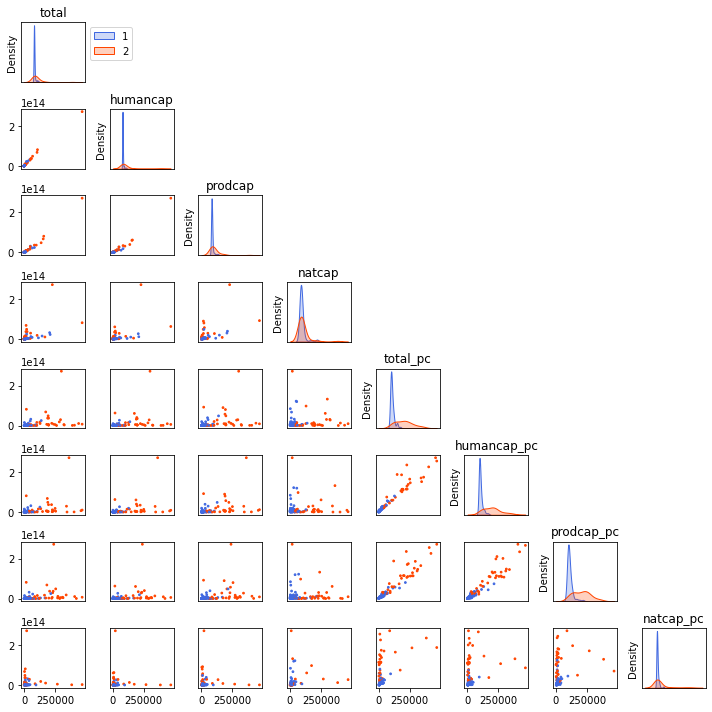

In [8]:
# import plot pairwise scatter function
from lib.plots import plot_pairwise_scatter

# call plot pairwise scatter function
plot_pairwise_scatter(sr_targets, df_features, label_values)

**First observation/interpretation: skewness of distribution**

The first remarkable observation that we see is that for all features the skewness of the distribution of observations with CQS label value 1 is clearly different than observations with CGS label 2. The reason for this deviation, which manifests itself in a positively skewed distribution is clearly visible in the scatterplots: large positive outliers.

**First conclusion:** In order to normalise/standardise the distribution of the data we have to pre-process the data by taking the log of the values of all of the features. We use the log with base 10 as it was demonstrated in tutorial 2 (we could have also taken the natural logarithm).

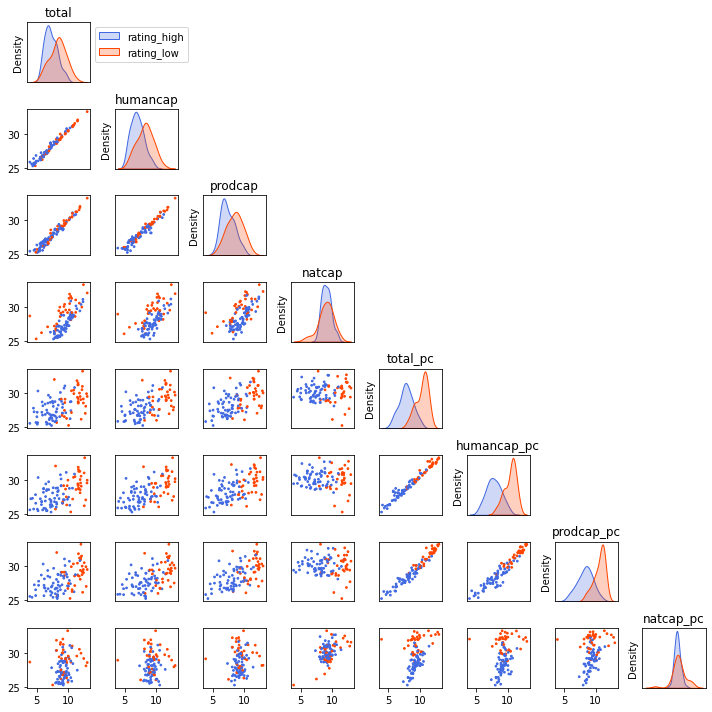

In [9]:
# take the log (base 10) of the features
df_features = np.log(df_features)

# call plot pairwise scatter function again (with the log of the feature values)
plot_pairwise_scatter(sr_targets, df_features, label_names)

**Second observation/interpretation: classification importance**

The distributions look much more normal now. When we look for features that we expect to be important in our classification model, we are looking for features that have a strikingly different distribution between the two CQS labels. The distribution plots on the vertical axis of our scatter plot matrix enable us to easily identify such difference in distributions. We are especially looking for features whose distributions and means between the two CQS labels 1 and 2 seem to be as much apart as possible.

**Second conclusion:** The means of the distribution of the following features are remarkably different between the CQS labels:
- `total_pc` (total wealth per capita), 
- `humancap_pc` (human capital per capita)
- `prodcap_pc` (produced capital per capita). 

Thus, we expect these features to be most important in our classification model. It is quite intuitive that the variables per capita are much more meaningful than absolute aggregate values, because per capita values remove the country/economy size effect. After all, we can have large poor countries that have large absolute aggregate capital values with low ratings on the one hand, and small rich countries with small absolute aggregate capital values with high ratings on the other hand. The per capita values seem to be a much better classifying features for our model.

---

# Question 2
**10 points**

Based on your arguments in Question 1, decide for two features. These two features `feature1, feature2` will be your inputs for the subsequent classifications.

Make a plot and describe what a linear classifier is likely to do. What challenges could it run into? 

**Answer**

We have chosen total wealth per capita (total_pc) and produced capital per capita (prodcap_pc) to be our features of choice, based on our conclusion in question 1.

In [10]:
feature1 = 'total_pc'
feature2 = 'prodcap_pc'

Next, we create a scatterplot of our selected features (total wealth per capita vs produced capital per capita). In addition, we add a hypothetical separation line that would be generated by a linear classifier.

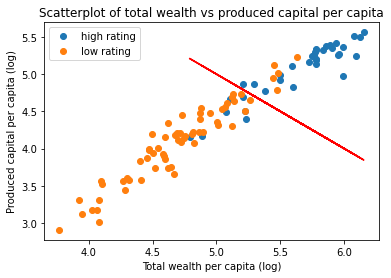

In [11]:
# Creating a scatterplot of log values of the two selected features 
x1 = np.log10(df_data.total_pc[df_data.cqs_group2 == 1])
x2 = np.log10(df_data.total_pc[df_data.cqs_group2 == 2])
y1 = np.log10(df_data.prodcap_pc[df_data.cqs_group2 == 1])
y2 = np.log10(df_data.prodcap_pc[df_data.cqs_group2 == 2])

plt.figure()
plt.plot(x1, y1, 'o', label='high rating') # high rating data points
plt.plot(x2, y2, 'o', label='low rating') # low rating data points

# Add a separation line to indicate what a linear classifier will do (see interpretation)
plt.plot(x1, -x1 +10, color = 'red')

plt.title('Scatterplot of total wealth vs produced capital per capita')
plt.xlabel('Total wealth per capita (log)')
plt.ylabel('Produced capital per capita (log)')
plt.legend()

plt.show()

**Interpretation**

A linear classifier would draw a seperation line between the two label clusters on the scatterplot of our two selected features, in order to classify data points either 1 (=high rating) or 2 (=low rating). We have drawn a separation line in the plot above as a representation of a linear classifier. _Note that this is not a correct/calculated line, but a visual representation to demonstrate what a linear classifier could look like and would do. The slope and intercept of the line would probably be different. The point is that the model will create a **straight** separation line._ Every datapoint on the upper right side of the line would be classified label 1 (high rating) in our predictions from the model, and everything on the lower left side would be classified as label 2 (low rating).

---

# Question 3
**15 points**

Use a linear support vector machine from the `sklearn.svm` module and plot the results. 

For the plot, import `plot_classification_contours` from `lib.plots`. Use it like this
```
plot_classification_contours(X, y, clf, [feature1,feature2])
```
where `clf` is the sklearn classifier object. `X` is a numpy array with `[n_obs, n_features]` dimensions and `y` is a numpy array with `[n_obs,]` dimensions.

**Hint:** You can leave the default options of your classifier. But if you decide to adjust them, please give an explanation.

**Answer**

We initiate a linear SVM model from scikit-learn, and train it on our data. The default parameter kernel for the SVC class is `rbf`, which stands for _radial basis function_. However, for now, we need a linear classifier, and we change this parameter to `linear`. The radial basis function is used in the next question.

In [12]:
from sklearn.svm import SVC
from lib.plots import plot_classification_contours
# We could also use linearSVC, but SVC with a linear kernel is technically the same

# Convert to numpy arrays
y = sr_targets.values
X = df_features[[feature1, feature2]].values

# Instantiate support vector classifiction object from sklearn
# We are using a linear classifier, thus we pass a 'linear' kernel parameter, since the default is rbf 
clf = SVC(kernel='linear')

# Fit the SVM model according to our given training data
clf.fit(X, y)

SVC(kernel='linear')

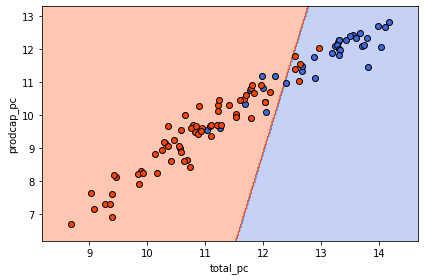

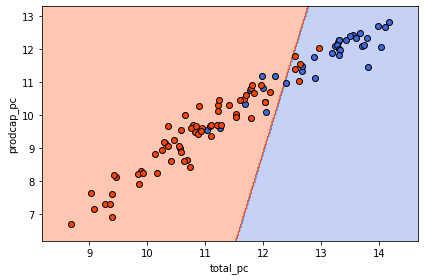

In [13]:
plot_classification_contours(X, y, clf, [feature1, feature2])

**Interpretation**

In our contour plot we see a visual representation of our linear classifier (SVM) model. The model basically calculates the best division line for the prediction of our labels (based on the minimalisation of the loss function). Everything right of the line, in the blue zone will be classified as 1 (=high rating), and every data point left of the line, in the orange zone, will be classified as 2 (=low rating). 

---

# Question 4
**25 points**

How well did the classification go? 

Make predictions and call them `y_pred`. Write four functions to compute the four elements of a confusion matrix. Name them appropriately and cross check their results with the output of the following plot
```
plot_confusion_matrix(y, y_pred, label_names, normalize=True)
```
Once again, you can import this function from `lib.plots`.

Furthermore, write two functions to compute the precision and recall of your classifier. 

**Hint:** The functions you write should have the following structure:
```
def true_positive(y_true, y_pred):
    # magic
    return TP
```
It is important here that `y_true` and `y_pred` follow the same binary classifications and agree on what's "positive" and whats "negative".

**Answer**

First, we calculate the predicted values and present a confusion matrix (and its interpretation). Next we present four functions to compute the four elements of a confusion matrix, and two functions to compute the precision and recall of our classifier.

In [14]:
from lib.plots import plot_confusion_matrix

# Compute predicted values
y_pred = clf.predict(X)

**Explanation Confusion Matrix:**

A confusion matrix presents the actual value for y against the predicted y values. It tells us how often the model has predicted the dependent variable (y) correctly/incorrectly. In this case, the y has the following binary outcome for the credit quality; high rating (=1) and low rating (=2). It consists of four element; true positive (TP), true negative (TN), false positive (FP), and false negative (FN). In the matrix, the high ratings are defined as positive and the low ratings are presented as negative. 

Confusion matrix, without normalization
[[27  9]
 [ 5 59]]


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

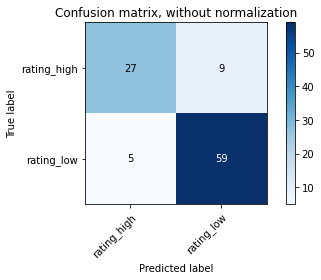

In [15]:
# Plot (non-normalised) confusion matrix
plot_confusion_matrix(y, y_pred, label_names)

**Interpretation Confusion Matrix (without normalization):**

The classification went well. The values of the diagonal elements which reflect the true positive (high rating predicted accurately by the model) and true negative (low rating predicted accurately by the model) are high compared to the values for type I, type II error. Out of 100 observations, 86 are correctly predicted (TP and TN) and 14 are incorrectly predicted (FP and FN) Type I, Type II error. The values shown in the confusion matrix above were also calculated separately using the four functions below, showing the same results. 

In [22]:
def true_positive(y_true, y_pred): # for the true high ratings
    """
    This function returns the number of true positive values based on the true and predicted y values
    
    Input: 
        y_true (ndarray): True y values 
        t_pred (ndarray): Predicted y values
    
    output: 
        TP (int): number of true positives
    """
    TP=0 # counter
    for i in range(len(y_pred)): 
        if y_true[i] == y_pred[i] == 1:
            TP += 1
    
    return TP

In [23]:
def true_negative(y_true, y_pred): # for the true low ratings
    """
    This function returns the number of true negative values based on the true and predicted y values
    
    Input: 
        y_true (ndarray): True y values 
        t_pred (ndarray): Predicted y values
    
    output: 
        TN (int): number of true negatives
    """
    TN=0 # counter
    for i in range(len(y_pred)):
        if y_true[i] == y_pred[i] == 2:
            TN  +=1
    
    return TN

In [24]:
def false_positive(y_true, y_pred): # for the falsely predicted high ratings
    """
    This function returns the number of false positive values based on the true and predicted y values
    
    Input: 
        y_true (ndarray): True y values 
        t_pred (ndarray): Predicted y values
    
    output: 
        FP (int): number of false positives
    """
    FP=0 # counter
    for i in range(len(y_pred)):
        if (y_pred[i] == 1) & (y_pred[i] != y_true[i]):
            FP +=1
            
    return FP

In [25]:
def false_negative(y_true, y_pred): # for the falsely predicted low ratings
    """
    This function returns the number of false negative values based on the true and predicted y values
    
    Input: 
        y_true (ndarray): True y values 
        t_pred (ndarray): Predicted y values
    
    output: 
        FN (int): number of false negatives
    """
    FN=0 # counter
    for i in range(len(y_pred)):
        if (y_pred[i] == 2) & (y_pred[i] != y_true[i]):
            FN +=1
    
    return FN

In [26]:
print('The number of true positive values is: ' + str(true_positive(y, y_pred)))
print('The number of true negative values is: ' + str(true_negative(y, y_pred)))
print('The number of false positive values is: ' + str(false_positive(y, y_pred)))
print('The number of false negative values is: ' + str(false_negative(y, y_pred)))

The number of true positive values is: 27
The number of true negative values is: 59
The number of false positive values is: 5
The number of false negative values is: 9


We use the following formulas for precision and recall ([reference](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall)): 

$$
Precision = \dfrac{TP}{TP + FP}
$$

$$
Recall = \dfrac{TP}{TP + FN}
$$


In [27]:
def precision(y_true, y_pred):
    """
    This function returns the precision (between 0 and 1) based on the true and predicted values of y
    
    Input: 
        y_true (ndarray): True y values 
        t_pred (ndarray): Predicted y values
    
    output: 
        precision: fraction between 0 and 1 (float)
    """
    TP = true_positive(y_true, y_pred)
    FP = false_positive(y_true, y_pred)
    
    precision = TP / (TP + FP)
    return precision

In [28]:
def recall(y_true, y_pred):
    """
    This function returns the precision (between 0 and 1) based on the true and predicted values of y
    
    Input: 
        y_true (ndarray): True y values 
        t_pred (ndarray): Predicted y values
    
    output: 
        recall: fraction between 0 and 1 (float)
    """
    TP = true_positive(y_true, y_pred)
    FN = false_negative(y_true, y_pred)
    
    recall = TP / (TP + FN)
    return recall

Now that we have written all founr functions to calculate true/false positives/negatives, and two functions to compute precision/recall, we are able to compute these values for the results of our model:

In [29]:
# Calculate precision and recall
pr = precision(y, y_pred)
rc = recall(y, y_pred)

# Calculate precision, round to 4 decimals for readability
print("Precision of the model is: " + str(round(pr, 4)))

# Calculate recall, round to 4 decimals for readability
print("Recall of the model is: " + str(round(rc, 4)))

Precision of the model is: 0.8438
Recall of the model is: 0.75


**Interpretation for the Precision and the Recall values:**

A precision of 84% was generated for the SVC linear model. This means that among the high credit rating predictions (FP & TP), 84% were accurately predicted. In other words, the proportion of positive identifications that was actually correct is 84%.

A recall of 75% indicates that 75% of high credit rating was correctly classified (TP) compared to 25% of high credit rating misclassified (FP). In other words, the proportion of actual positives that was identified correctly is 75%.

Normalized confusion matrix
[[0.75     0.25    ]
 [0.078125 0.921875]]


<AxesSubplot:title={'center':'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

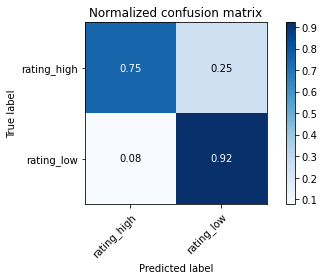

In [31]:
plot_confusion_matrix(y, y_pred, label_names, normalize=True)

**Interpretation normalised confusion matrix**

The normalized confusion matrix shows the number of correct classifications for each class (diagonal elements) vs misspecifications (off-diagonal elements). In this case, the number of true high credit ratings vs true low ratings. 

A value of 0.75 of TP shows that among high credit rating predictions,  75% of them were correctly classified, versus 25% of high credit rating misclassified (FP). Similarly, among low credit rating predictions,  a value of 92 % of low credit rating was correctly classified (TN), versus a 8% of low credit rating misclassified (FN). 


# Question 5
**15 points**

Change the classifier to a radial basis function and discuss the results. Does it do better than the linear classifier? If so, in what respect? If not, why? Is the confusion matrix different?

**Hint:** In sklearn, the `gamma` parameter may need some adjustment, depending on your features.

**Answer**

First, we intiate a SVM model. This time, we use a `rbf` kernel parameter, in order to use a radial basis function. For now, we have decided to use a `scale` gamma parameter. Our model has actually a better performance when we choose a higher value for `gamma`, but we will discuss the tradeoff between performance and overfitting after our model initiation and evaluation.

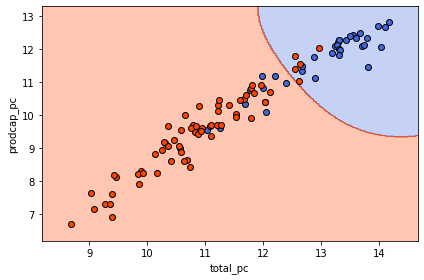

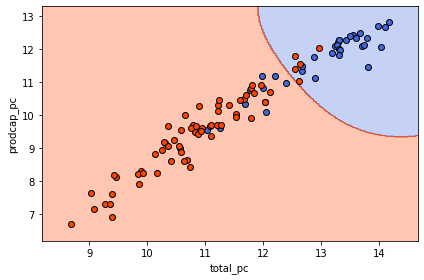

In [32]:
# Instantiate support vector classifiction object from sklearn with rbf (radial basis function) kernel
rbfSVC = SVC(kernel='rbf', gamma='scale')

# Fit the SVM model according to our given training data
rbfSVC.fit(X, y)

# Generate a classification contour plot in order to visually understand how our rbf model is different.
plot_classification_contours(X, y, rbfSVC, [feature1, feature2])

**First interpretation of contour plot**

In our contour plot we immediately see one large difference between the contour plots of our SVM model with a linear classifier and a radial basis function. The difference is explained intuitively: a linear classifier generates a straight seperation line, whereas a radial basis function does not have this linear classification limitation. And this is what we see in our `rbf` countour plot: instead of a line, we see a classification 'area'.

**Evaluation of the performance of our model**

Just as with our linear classifier, we compute the confusion matrix and the precision/recall for our new model in order to compare the two models.

Normalized confusion matrix
[[0.72222222 0.27777778]
 [0.078125   0.921875  ]]


<AxesSubplot:title={'center':'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

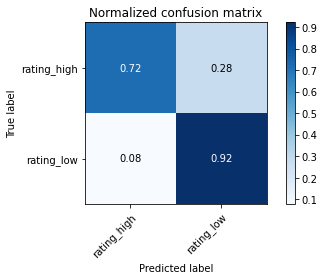

In [33]:
# Perform classification on samples in X
y_pred_rbf = rbfSVC.predict(X)

# Generate confusion matrix with true and predicted values for y (cqs_group2)
plot_confusion_matrix(y, y_pred_rbf, label_names, normalize=True)

**Interpretation Normalized Confusion Matrix:**

The ratings in the normalized confusion matrix from the radial basis function look similar to the ratings from the linear function. However, a small decrease in the true positive rate for the RBF can be found, from 0.75 to 0.72, and therefore the false positive rate increased from 0.25 to 0.28 in the RBF. This means that in the RBF less high rates are correctly predicted than in the linear function. 

In [34]:
# calculating precision and recall
pr = precision(y, y_pred_rbf)
rc = recall(y, y_pred_rbf)

# Calculate precision, round to 4 decimals for readability
print("Precision of the model is: " + str(round(pr, 4)))

# Calculate recall, round to 4 decimals for readability
print("Recall of the model is: " + str(round(rc, 4)))

Precision of the model is: 0.8387
Recall of the model is: 0.7222


**Interpretation Precission and Recall value of the radial basis function:**

As abovementioned, the true positive rate, or the recall value, decreased for the RBF. Furthermore, the precision rate of the linear model is higher than the precision rate of the RBF, with values of 0.8438 and 0.8387 respectively. This means that in this model less high credit ratings were correctly predicted.

Overall, it can be concluded that the linear classifier does a better job in predicting the model than the radial basis function

**Additional analysis: Gamma and the issue of overfitting**

At the start of our answer, we have indicated that for the `gamma` parameter we have used the 'scale' input. According to the [SKLearn documentation](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html) the `gamma` parameter is defined as follows:

```
Intuitively, the gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.
```

So, in other words, the inverse of the radius of influence of samples selected by the model can be seen as how precise the model will be tailored to our specific (training) dataset. However, a very important issue related to the generation of machine learning algorithms is external validity. We demonstrate this issue with an instantiation of our `rbf` model. However, this time we choose a relatively high value for `gamma`

In [35]:
# Instantiate support vector classifiction object from sklearn with rbf (radial basis function) kernel with gamma=10
rbfSVC2 = SVC(kernel='rbf', gamma=10)

# Fit the SVM model according to our given training data
rbfSVC2.fit(X, y)

SVC(gamma=10)

Normalized confusion matrix
[[0.80555556 0.19444444]
 [0.         1.        ]]


<AxesSubplot:title={'center':'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

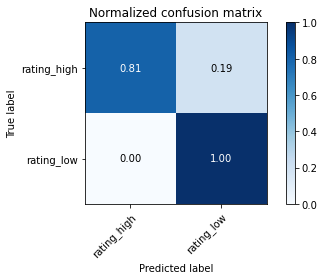

In [36]:
# Perform classification on samples in X
y_pred_rbf2 = rbfSVC2.predict(X)

# Generate confusion matrix with true and predicted values for y (cqs_group2)
plot_confusion_matrix(y, y_pred_rbf2, label_names, normalize=True)

A first reaction could be: we have significantly increased the performance of our model! With such a good financial/economic prediction model we could become rich! (As a matter of fact, when we increase gamma to over 9000 (!) we get a perfect prediction score.

However, there is another side of the coin when increasing the gamma parameter, and that is shown with a contour plot below.

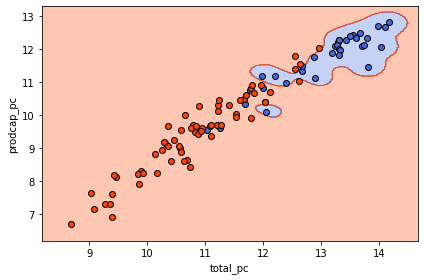

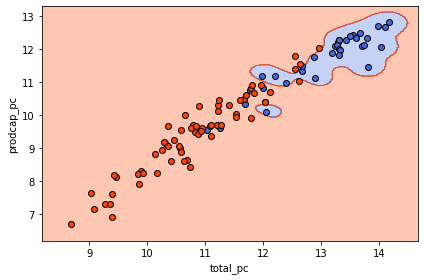

In [37]:
# Generate a classification contour plot in order to visually understand how our rbf model is different.
plot_classification_contours(X, y, rbfSVC2, [feature1, feature2])

The contour plot of our model with a high `gamma` value shows us the problem of overfitting. Our model became incredibly precise. However, it became precise **tailored to our data**. It is intuitively seen that there is a high probability our model will work poorly when presented with data outside of our current dataset. Thus, the external validity of our model is very poorly because of overfitting during the training of our model.

**Conclusion**

When we manually increase the `gamma` parameter of our model, we increase the precision of our model. However, this increased performance comes at a price, namely the problem of overfitting and decreased external validity and reliability. Therefore, we have chosen 'scale' as our `gamma` parameter. Scale calculates the parameter as follows:

$$
gamma = \dfrac{ 1}{n_{features} * X.var()}
$$

The scale parameter was chosen over auto (default parameter) because it had a slightly better performance, while still minimizing the problem of overfitting.

---

# Question 6
**15 points**

Let us know consider a third feature `feature3` as an additional predictor variable. Look at the previous pairplot for this purpose and identify a third input.

**Answer**

In Q1 we identified three features that according to our reasoning were expected to be most important classifiers. These were `total_pc` (total wealth per capita), `humancap_pc` (human capital per capita) and `prodcap_pc` (produced capital per capita). In Q2 we have already used `total_pc` and `prodcap_pc`, so now we include `humancap_pc` as well.

In [38]:
feature3 = 'humancap_pc'

You can again visualize the three features using 
```
selected = [feature1,feature2,feature3]
plot_pairwise_scatter(sr_targets, df_features.loc[:,selected], label_values)
```

Use this new feature and rerun the classification. Does the new feature improve the predictions, or is it possible that it does worse? Please explain.

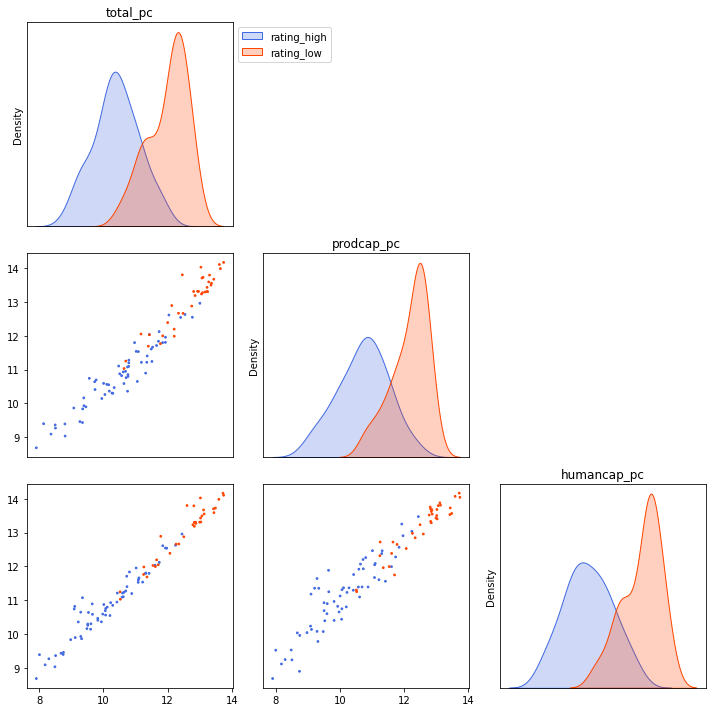

In [39]:
# Generating a matrix of pairwise scatter plots to see how the features are related
selected = [feature1,feature2,feature3]
plot_pairwise_scatter(sr_targets, df_features.loc[:,selected], label_names)

Actually, why not make a 3d scatter plot since we have three features?

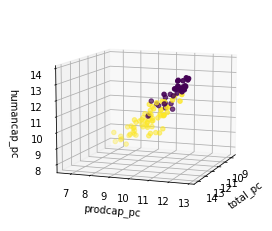

In [40]:
# importing the 3d plot package from mpl
from mpl_toolkits.mplot3d import Axes3D

# Generate 3d scatterplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# We use underscores because we already have a global y variable
x_ = df_features.loc[:,feature1]
y_ = df_features.loc[:,feature2]
z_ = df_features.loc[:,feature3]
label = df_data.loc[:,'cqs_group2']

ax.scatter(x_, y_, z_, c=label, marker='o')

# set labels
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel(feature3)

# Not really possible to interactively pan/zoom the 3d plot in a notebook, but you can change the view angle
# by changing the input values for view_init(x, y)
ax.view_init(10, 20)

plt.show()

**Interpretation of a (linear) classifier with three input features**

In the matrix of pairwise scatter plots (and the 3d plot that incorporates all of them) we see that there is a clear division between the two labels. With three input features, however, the linear classifier will not draw a seperation line, but a seperation pane.

In the next step we initiate and train a linear classifier, ad evaluate its performance. We chose a `linear` classifier (opposed to an `rbf`) because it had a slightly better performance in our previous questions.

In [41]:
# Re-initiating feature input parameters
X = df_features.loc[:, selected].values

# We are using a linear classifier, thus we pass a 'linear kernel' parameter, since the default is rbf 
linSVC6 = SVC(kernel='linear') # 6 refers to question 6

# Fit the SVM model according to our given training data
linSVC6.fit(X, y)

SVC(kernel='linear')

Normalized confusion matrix
[[0.77777778 0.22222222]
 [0.0625     0.9375    ]]


<AxesSubplot:title={'center':'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

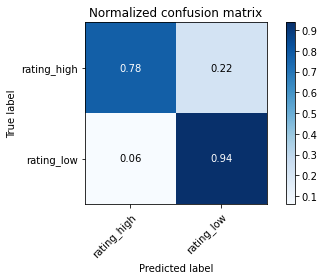

In [42]:
y_predicted=linSVC6.predict(X)
plot_confusion_matrix(y, y_predicted, label_names, normalize=True)

In [43]:
pr = precision(y, y_predicted)
rc = recall(y, y_predicted)

# Calculate precision, round to 4 decimals for readability
print("Precision of the model is: " + str(round(pr, 4)))

# Calculate recall, round to 4 decimals for readability
print("Recall of the model is: " + str(round(rc, 4)))

Precision of the model is: 0.875
Recall of the model is: 0.7778


**Conclusion for the linear support vector machine with three input parameters:**

Since the linear support vector machine does a better job in predicting the model, this classifier was used to compare the three feature model (total_pc, prodcap_pc and the humancap_pc) with the two feature model used in the questions before (total_pc and prodcap_pc). To compare both models, another (normalized) confusion matrix was made. Moreover, the precision and the recall values were obtained. 

The results show that the true positive rate (recall) for the three feature model is 0.78 instead of 0.75. The true negative rate also increases from 0.92 for two features to 0.94 for the three features model. Therefore, the total normalized true predicted values increases from 1.67 to 1.72. Furthermore, the precision rate shows an increase from 0.8438 to 0.875; more high credit ratings were predicted correctly.  
Hence, it is concluded that the model with the three explanatory variables does a (slightly) better job in predicting the labels (high/low ratings). 

---

# Question 7
**10 points**

Finally, let us switch from a binary classification to a classification of three outcomes. This corresponds to the columns `cqs_group3`, where we have `rating_high`, `rating_medium` and `rating_low`.

In [44]:
target_name = 'cqs_group3'

sr_targets = df_data.loc[:,target_name]

In [45]:
label_values = [1,2,3]
label_names = ['rating_high', 'rating_mid', 'rating_low']

You can again use the 
```
selected = [feature1,feature2,feature3]
plot_pairwise_scatter(sr_targets, df_features.loc[:,selected], label_values)
```
command to visualize your data.

Inspect the classification results. Can you use the functions you defined previously to asses the results, or do you need to make adjustments? If so, do you have to completely rewrite the functions or are only minor adjustments necessary?

Bonus question
**10 points**
Compute the confusion matrix.  
Compute precision and recall for this case.

**Answer**

First, we start by initiating and training the model. In order the evaluate our model, we need to make slight adjustments in how we calculate our true/false positive/negatives. Finally, we evaluate our model using precision/recall and a confusion matrix.

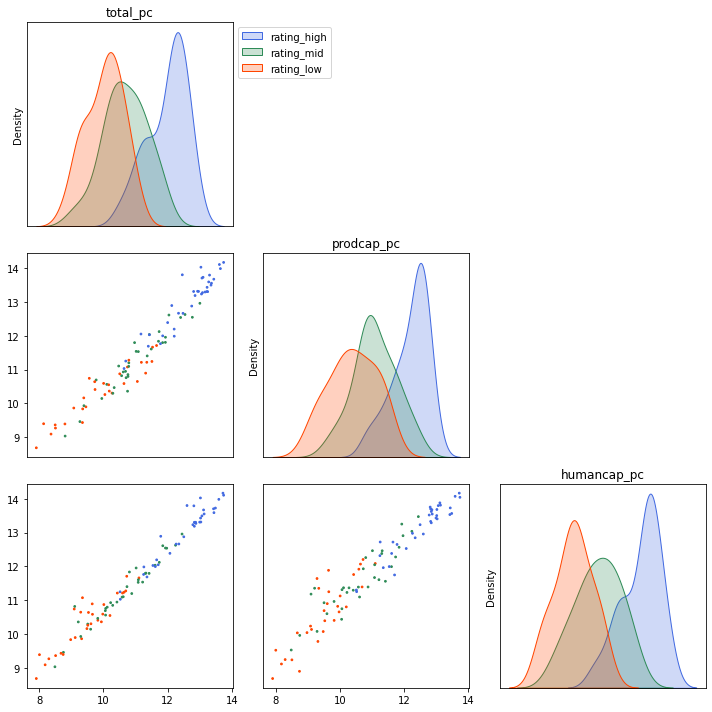

In [46]:
## Create a scatter plot of the selected features and three labels
selected = [feature1,feature2,feature3]
plot_pairwise_scatter(sr_targets, df_features.loc[:,selected], label_names)

**Interpretation**

We see a somewhat similar results for the matrix of pairwise scatterplots. The only difference is that we have three labels now. These labels seem to have slightly different distributions. We observe that higher levels of our selected features are linked with higher ratings.

**Initiation of the model**

In [47]:
# We are using a linear classifier, thus we pass a 'linear kernel' parameter, since the default is rbf 
# Number 7 is used as a suffix, refering to question number 7
linSVC7 = SVC(kernel='linear')

# Define the new y with 3 targets: low ratings (3), middle ratings (2), high ratings (1) 
y7 = sr_targets.values

# Re-initiating feature input parameters
X = df_features.loc[:, selected].values

# Fit the SVM model according to our given training data
linSVC7.fit(X, y7)

# Predict the new y values
y_pred7 = linSVC7.predict(X)

**Rewriting the functions for true/false positive/negative values**

Since the target values (y) are set to three outcomes, low ratings (y=3), middle ratings (y=2), and high ratings(y=1), the definition of the predicted negative value changes. The positive value stays the same; when y equals to 1 or, in other words, when the credit rating is high. Therefore, the true positive function remained the same as used before. However, now two values account as a negative value; y=2 and y=3 and the functions were slightly changed. The true negative classification tells us how many predicted y=2 and y=3 values were actually correct. The false negative, on the otherhand, shows how many observations were incorrectly predicted as middle- or low ratings. Finally, the false positive classification gives the number of predicted low- and middle ratings, when the actual rating was classified as high. 

The functions that we have written below actually also work with two label classes. So, technically, we could use these function in the previous questions.

In [48]:
# Actually, the function for true positives does technically not need to be rewritten since the formula stays the same
# but we include it for the sake of completeness
def true_positive(y_true, y_pred): #for the true high ratings
    """
    This function returns the number of true positive values based on the true and predicted y values
    
    Input: 
        y_true (ndarray): True y values (3 labels)
        t_pred (ndarray): Predicted y values (3 labels)
    
    output: 
        TP (int): number of true positives
    """
    TP=0
    for i in range(len(y_pred)): 
        if y_true[i]==y_pred[i]==1:
            TP += 1
            
    return TP

In [49]:
def true_negative(y_true, y_pred): #for the true low and middle ratings
    """
    This function returns the number of true negative values based on the true and predicted y values (3 labels)
    
    Input: 
        y_true (ndarray): True y values (3 labels)
        t_pred (ndarray): Predicted y values (3 labels)
    
    output: 
        TN (int): number of true negatives
    """
    TN=0
    for i in range(len(y_pred)):
        if (y_true[i] != 1) & (y_pred[i] !=1):
            TN  +=1
            
    return TN

In [50]:
def false_positive(y_true, y_pred): #for the falsely predicted high ratings
    """
    This function returns the number of false positive values based on the true and predicted y values (3 labels)
    
    Input: 
        y_true (ndarray): True y values (3 labels)
        t_pred (ndarray): Predicted y values (3 labels)
    
    output: 
        FP (int): number of false positives
    """
    FP=0
    for i in range(len(y_pred)):
        if (y_pred[i] == 1) & (y_pred[i] != y_true[i]):
            FP +=1
            
    return FP

In [51]:
def false_negative(y_true, y_pred):
    """
    This function returns the number of false negative values based on the true and predicted y values (3 labels)
    
    Input: 
        y_true (ndarray): True y values (3 labels)
        t_pred (ndarray): Predicted y values (3 labels)
    
    output: 
        FN (int): number of false negatives
    """
    FN=0
    for i in range(len(y_pred)):
         if (y_true[i]==1) & (y_pred[i]!=1):
            FN +=1
            
    return FN

In [52]:
# Compute the TP, TN, FP, FN
print('The number of true positive values is: ' + str(true_positive(y7, y_pred7)))
print('The number of true negative values is: ' + str(true_negative(y7, y_pred7)))
print('The number of false positive values is: ' + str(false_positive(y7, y_pred7)))
print('The number of false negative values is: ' + str(false_negative(y7, y_pred7)))

The number of true positive values is: 28
The number of true negative values is: 60
The number of false positive values is: 4
The number of false negative values is: 8


Confusion matrix, without normalization
[[28  8  0]
 [ 4 22  8]
 [ 0  8 22]]


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

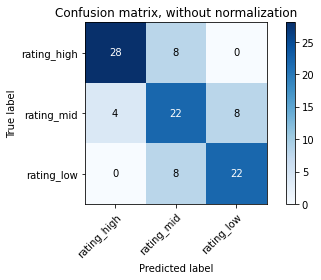

In [53]:
# Non-normalized Confusion Matrix
plot_confusion_matrix(y7, y_pred7, label_names, normalize=False)

Normalized confusion matrix
[[0.77777778 0.22222222 0.        ]
 [0.11764706 0.64705882 0.23529412]
 [0.         0.26666667 0.73333333]]


<AxesSubplot:title={'center':'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

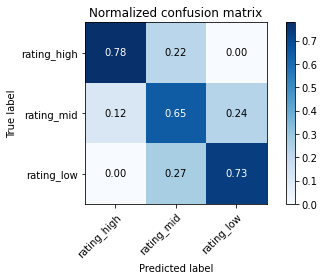

In [54]:
# Normalized Confusion Matrix
plot_confusion_matrix(y7, y_pred7, label_names, normalize=True)

**Precision and recall**

The precision and recall functions do not have to be changed, since they are only dependend on the T/F-P/N values.

In [55]:
pr = precision(y7, y_pred7)
rc = recall(y7, y_pred7)

# Calculate precision, round to 4 decimals for readability
print("Precision of the model is: " + str(round(pr, 4)))

# Calculate recall, round to 4 decimals for readability
print("Recall of the model is: " + str(round(rc, 4)))

Precision of the model is: 0.875
Recall of the model is: 0.7778


**Conlusion Bonus:**

As a result of the increasing number of outcomes, the 2X2 confusion matrix increased to a 3X3 matrix. To compute values of the four elements of this matrix, an explanation was given above. 

However, it is striking that the results for the precision and the recall rate are exactly the same as in question 6, where 2 targets and 3 features were used instead of 3 targets and 3 features. The reason is that exactly the same data points for a high rating were identified. The only extra split our model made was seen between middle and low ratings.


---